# DERMATOLOGY DATABASE

# Data Set Infromation:

This database contains 34 attributes, 33 of which are linear valued and one of them is nominal. 

Number of Instances: 366
Number of Attributes: 34

Attribute Information:

Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)

      1: erythema
      2: scaling
      3: definite borders
      4: itching
      5: koebner phenomenon
      6: polygonal papules
      7: follicular papules
      8: oral mucosal involvement
      9: knee and elbow involvement
     10: scalp involvement
     11: family history, (0 or 1)
     34: Age (linear)
     
Histopathological Attributes: (take values 0, 1, 2, 3)

     12: melanin incontinence
     13: eosinophils in the infiltrate
     14: PNL infiltrate
     15: fibrosis of the papillary dermis
     16: exocytosis
     17: acanthosis
     18: hyperkeratosis
     19: parakeratosis
     20: clubbing of the rete ridges
     21: elongation of the rete ridges
     22: thinning of the suprapapillary epidermis
     23: spongiform pustule
     24: munro microabcess
     25: focal hypergranulosis
     26: disappearance of the granular layer
     27: vacuolisation and damage of basal layer
     28: spongiosis
     29: saw-tooth appearance of retes
     30: follicular horn plug
     31: perifollicular parakeratosis
     32: inflammatory monoluclear inflitrate
     33: band-like infiltrate
     
Missing Attribute Values: 8 (in Age attribute). Distinguished with '?'.

Class Distribution:
       Database:  Dermatology
       
       Class code:   Class:                  Number of instances:
       1             psoriasis			            112
       2             seboreic dermatitis             61
       3             lichen planus                   72
       4             pityriasis rosea                49
       5             cronic dermatitis               52    
       6             pityriasis rubra pilaris        2


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("C:\\Users\\admin\\Documents\\dermatology.csv", header=None)

In [5]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [6]:
data.shape
d=np.array(data)     

In [7]:
print("Number of Instances: ",d.shape[0])
print("Number of Attributes: ",d.shape[1]-1)

Number of Instances:  366
Number of Attributes:  34


In [8]:
classes=['psoriasis','seboreic dermatitis','lichen planus','pityriasis rosea','cronic dermatitis','pityriasis rubra pilaris']

In [9]:
x=d[:,0:34]
y=d[:,-1]

In [10]:
print(x.shape,y.shape)

(366, 34) (366,)


In [11]:
unique, counts = np.unique(y, return_counts=True)
for i in range(0,6):
    print (classes[i],"=",counts[i])


psoriasis = 112
seboreic dermatitis = 61
lichen planus = 72
pityriasis rosea = 49
cronic dermatitis = 52
pityriasis rubra pilaris = 20


In [12]:
mean=0
count=0
for i in range(0,365):
    if(x[i][33]!='?'):
        x[i][33]=int(x[i][33])
for i in range(0,365):
    if(x[i][33]!='?'):
        mean+=x[i][33]
        count+=1
mean//=count
for i in range(0,365):
    if(x[i][33]=='?'):
        x[i][33]=mean
        
        
        

In [13]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=0)

In [14]:
x_train=x_train.astype('int')
x_test=x_test.astype('int')
y_test=y_test.astype('int')
y_train=y_train.astype('int')

In [15]:
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

# Accuracy for KNN K=6

In [16]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train_std, y_train)
y_pred=knn.predict(x_test_std)
print("Misclassified Samples: %d" %(y_test !=y_pred).sum())
print ("Accuracy: %.2f" %accuracy_score(y_test,y_pred))

Misclassified Samples: 1
Accuracy: 0.99


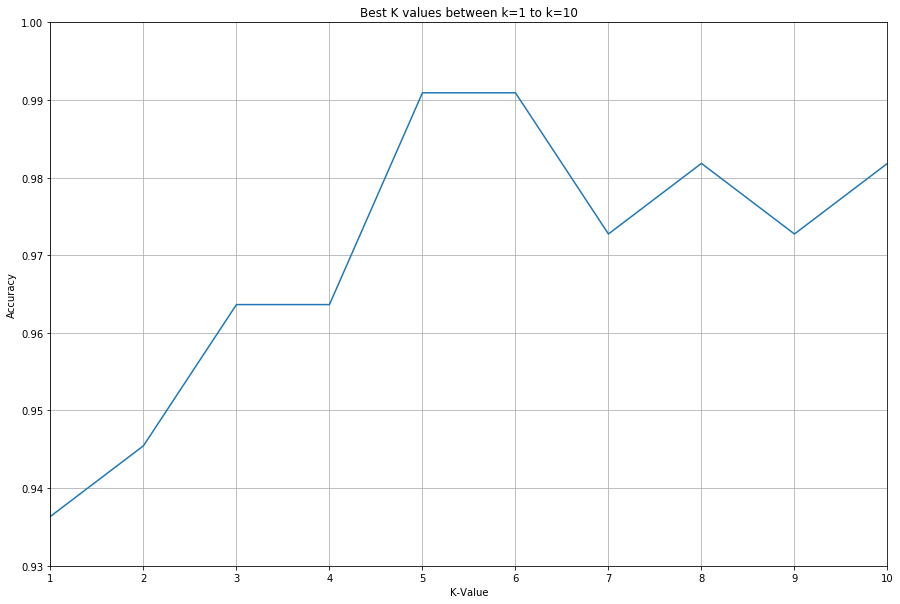

In [17]:
k=[]
test=[]
for i in range(1,11):
    c=0
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_std, y_train)
    y_pred=knn.predict(x_test_std)
    k.append(i)
    test.append(accuracy_score(y_test,y_pred))    
plt.figure(figsize=(15,10))
plt.plot(k,test)
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.title("Best K values between k=1 to k=10")
plt.grid()
plt.xlim(right=10)
plt.xlim(left=1)
plt.ylim(top=1)
plt.ylim(bottom=0.93)
plt.show()
    

# Best K value between K=1 to K=10
### Best K=5,6